In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\spark\\spark-3.0.0-bin-hadoop2.7'

In [2]:
import pyspark as ps

spark = ps.sql.SparkSession.builder \
    .master('local[4]') \
    .appName('spark-lecture') \
    .getOrCreate()

sc = spark.sparkContext

In [3]:
def myFn(n):
    a=0
    if n<=0.16:
        a=1
        return a
    elif n>0.16 and n<=0.33:
        a=2
        return a
    elif n>0.33 and n<=0.5:
        a=3
        return a
    elif n>0.5 and n<=0.66:
        a=4
        return a
    elif n>0.66 and n<=0.83:
        a=5
        return a
    elif n>0.83 and n<=1:
        a=6
        return a

In [23]:
import random as r
import pandas as pd
n = 100
r.seed(150)

heads = (sc.parallelize(range(n))
    .map(lambda _: r.random())
    .map(myFn)
    .collect())
df=pd.DataFrame(heads,columns=['face_values'])
print(df)

    face_values
0             5
1             2
2             1
3             2
4             6
..          ...
95            1
96            5
97            4
98            3
99            6

[100 rows x 1 columns]


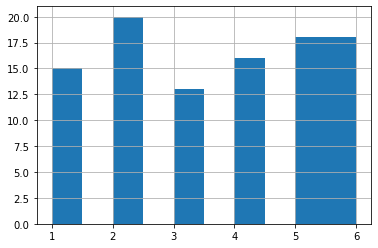

In [24]:
df.face_values.hist()